In [1]:
import pandas as pd
%matplotlib inline

Lets import medical_care data:

In [2]:
medical = pd.read_csv("data/medical_care.csv")
print(medical.shape)

(35072, 29)


The file includes socio-demographic data, including health insurance and various aspects of health care touchpoints for the respondent group of a survey conducted in the USA.

The collection includes 35072 observations and 27 variables:
 
* UMARSTAT – Marital status recode
* UCUREMP – Currently has employer coverage
* UCURNINS – Currently uninsured
* USATMED – Satisfied with quality of medical care
* URELATE – Number of relatives in household
* REGION – region
* STATE - state
* HHID – Household identification number
* FHOSP – In hospital overnight last year
* FDENT – Dental visits last year
* FEMER – Number of emergency room visits last year
* FDOCT – Number of doctor visits last year
* UIMMSTAT – Immigration status
* U_USBORN – U.S.- or foreign-born
* UAGE – Age topcoded
* U_FTPT – Full-time or part-time worker this year
* U_WKSLY – Weeks worked last year
* U_HRSLY – Hours worked per week last year
* U_USHRS – Hours worked per week this year
* HEARNVAL – Earnings amount last year - Household
* HOTHVAL – Household income, total exc. earnings
* HRETVAL – Retirement amount – Household
* HSSVAL – Social Security amount - Household
* HWSVAL – Wages and salaries amount – Household
* UBRACE – race
* GENDER – gender
* UEDUC3 – education level
* CEYES - color of eyes
* CHAIR - color of hair

Lets see how the datasets looks like:

In [3]:
# Increade max number of columns to display for this dataset.
pd.set_option("display.max_columns",50)
medical.head()

,UMARSTAT,UCUREMP,UCURNINS,USATMED,URELATE,REGION,STATE,HHID,FHOSP,FDENT,FEMER,FDOCT,UIMMSTAT,U_USBORN,UAGE,U_FTPT,U_WKSLY,U_HRSLY,U_USHRS,HEARNVAL,HOTHVAL,HRETVAL,HSSVAL,HWSVAL,UBRACE,GENDER,UEDUC3,CEYES,CHAIR
0,Never married,No,Yes,Very satisfied,2,Midwest,WI,55616128,No,0,0,0,US-born citizen,Yes,22,Full-time,52.0,40,40,0,0,0,0,0,White,Female,No HS diploma or GED,hazel,brown
1,Separated,Yes,No,Very satisfied,2,Midwest,WI,54704000,No,2,0,0,US-born citizen,Yes,30,Full-time,52.0,40,40,31468,5950,0,0,31468,White,Female,"HS diploma or GED, no bachelor's degree",blue,black
2,Married_live together,No,No,Very satisfied,5,Midwest,WI,57874272,No,0,1,0,US-born citizen,Yes,33,Part-time,52.0,30,30,24700,11340,0,4920,24700,White,Male,No HS diploma or GED,brown,brown
3,Divorced,No,Yes,Little dissatisfied,4,Midwest,WI,54106816,No,0,0,1,US-born citizen,Yes,41,Part-time,43.0,40,25,60000,39002,0,0,60000,Black,Female,No HS diploma or GED,brown,black
4,Never married,Yes,No,Very satisfied,0,Midwest,WI,54569152,No,2,0,0,US-born citizen,Yes,34,Full-time,52.0,40,40,55280,4200,0,0,55280,Black,Male,"HS diploma or GED, no bachelor's degree",brown,black


Lets see what are datatypes for all the variables.

It looks as if we made one mistake. HHID is an identification number. Therefore we should import is as a string and not as an int. Importing IDs as ints can be risky as leading zeros get trancuated at reading. All other qualitative variables are already typed as object.

In [4]:
medical.dtypes

UMARSTAT     object
UCUREMP      object
UCURNINS     object
USATMED      object
URELATE       int64
REGION       object
STATE        object
HHID          int64
FHOSP        object
FDENT         int64
FEMER         int64
FDOCT         int64
UIMMSTAT     object
U_USBORN     object
UAGE          int64
U_FTPT       object
U_WKSLY     float64
U_HRSLY       int64
U_USHRS       int64
HEARNVAL      int64
HOTHVAL       int64
HRETVAL       int64
HSSVAL        int64
HWSVAL        int64
UBRACE       object
GENDER       object
UEDUC3       object
CEYES        object
CHAIR        object
dtype: object

Reloading medical dataset with predefined set for HHID as str.

In [5]:
medical = pd.read_csv("data/medical_care.csv", dtype={"HHID":str})
medical.dtypes

UMARSTAT     object
UCUREMP      object
UCURNINS     object
USATMED      object
URELATE       int64
REGION       object
STATE        object
HHID         object
FHOSP        object
FDENT         int64
FEMER         int64
FDOCT         int64
UIMMSTAT     object
U_USBORN     object
UAGE          int64
U_FTPT       object
U_WKSLY     float64
U_HRSLY       int64
U_USHRS       int64
HEARNVAL      int64
HOTHVAL       int64
HRETVAL       int64
HSSVAL        int64
HWSVAL        int64
UBRACE       object
GENDER       object
UEDUC3       object
CEYES        object
CHAIR        object
dtype: object

Some variables are not numeric but qualitative. in some cases they are nominal (for example REGION) and in other ordinal (USATMED). Depending on the library and algorithm we may need to transform those variables.

We may need to:
* create ordered numerical labels
* unordered numerical labels
* do one hot encoding (binarization)

There are many ways to do all abovementioned actions. Lets see some examples starting with USATMED. We see that there are 5 unique levels. We can create a dictionary to map the variable.

In [8]:
print(medical.USATMED.unique())
print(medical.USATMED.value_counts())

['Very satisfied' 'Little dissatisfied' 'Little satisfied' 'No opinion'
 'Very dissatisfied']
Very satisfied         18002
Little satisfied       12636
Little dissatisfied     2470
Very dissatisfied       1091
No opinion               873
Name: USATMED, dtype: int64


In [9]:
satDict = {'Very satisfied':4,  'Little satisfied':3,
       'No opinion':2,'Little dissatisfied':1, 'Very dissatisfied':0}

In [10]:
medical["USATMED"]=medical.USATMED.map(satDict)
print(medical.USATMED.unique())
print(medical.USATMED.value_counts())

[4 1 3 2 0]
4    18002
3    12636
1     2470
0     1091
2      873
Name: USATMED, dtype: int64


Lets do the same with education

In [11]:
print(medical.UEDUC3.unique())
print(medical.UEDUC3.value_counts())
eduDict = {'No HS diploma or GED':0, "HS diploma or GED, no bachelor's degree":1,
 "Bachelor's degree and higher":2}
medical["UEDUC3"]=medical.UEDUC3.map(eduDict)
print(medical.UEDUC3.unique())
print(medical.UEDUC3.value_counts())

['No HS diploma or GED' "HS diploma or GED, no bachelor's degree"
 "Bachelor's degree and higher"]
HS diploma or GED, no bachelor's degree    20896
Bachelor's degree and higher               10322
No HS diploma or GED                        3854
Name: UEDUC3, dtype: int64
[0 1 2]
1    20896
2    10322
0     3854
Name: UEDUC3, dtype: int64


Lets change the type of the U_WKSLY to int.

In [12]:
medical["U_WKSLY"]=medical["U_WKSLY"].astype(int)

Lets look at our data set. It look as if there are errors in HEARNVAL and HOTHVAL as we should not be seing negative values there.

In [13]:
medical.describe()

,USATMED,URELATE,FDENT,FEMER,FDOCT,UAGE,U_WKSLY,U_HRSLY,U_USHRS,HEARNVAL,HOTHVAL,HRETVAL,HSSVAL,HWSVAL,UEDUC3
count,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000
mean,3.254220,2.288692,1.567262,0.331261,2.461280,39.435618,47.099510,41.270301,41.634552,39688.031621,7504.163321,1352.392935,2321.060761,37134.580748,1.184421
std,1.017474,1.520769,1.508148,0.795926,3.666897,11.302693,9.844522,13.153918,13.295147,57282.357668,16661.686112,6666.099716,5722.053708,54558.125077,0.608438
min,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000,1.000000,-19998.000000,-16902.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,31.000000,48.000000,38.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,2.000000,1.000000,0.000000,1.000000,40.000000,52.000000,40.000000,40.000000,24000.000000,485.000000,0.000000,0.000000,21000.000000,1.000000
75%,4.000000,3.000000,2.000000,0.000000,3.000000,47.000000,52.000000,48.000000,50.000000,60000.000000,8424.000000,0.000000,0.000000,56000.000000,2.000000
max,4.000000,14.000000,8.000000,5.000000,25.000000,82.000000,52.000000,126.000000,126.000000,687064.000000,315335.000000,149402.000000,100000.000000,687064.000000,2.000000


Lets look closer at those variables.

(64, 29)


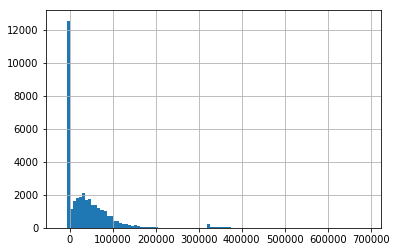

In [14]:
print(medical.query("HEARNVAL<0").shape)
medical.HEARNVAL.hist(bins=100)

(180, 29)


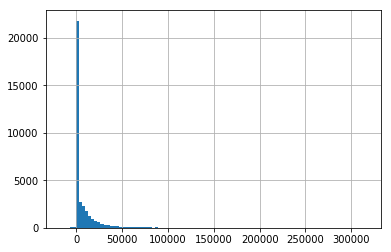

In [15]:
print(medical.query("HOTHVAL<0").shape)
medical.HOTHVAL.hist(bins=100)

It looks as if the problem is not profund. We can replace negative values with zero in these variables.

In [16]:
medical.loc[medical.HEARNVAL<0, "HEARNVAL"]=0
medical.loc[medical.HOTHVAL<0, "HOTHVAL"]=0

Lets look ath the number of relatives in the house hold. It looks as if there are vew cases where the value is greater than 5. Lets change those outliers to our new max of 5.

In [17]:
medical.URELATE.value_counts()

3     9084
2     7700
1     7399
0     4291
4     4194
5     1561
6      508
7      193
8       86
9       30
10      16
11       6
14       3
12       1
Name: URELATE, dtype: int64

In [18]:
medical.loc[medical.URELATE>5, "URELATE"]=5
medical.URELATE.value_counts()

3    9084
2    7700
1    7399
0    4291
4    4194
5    2404
Name: URELATE, dtype: int64

Finally we can save our data set in a binary format so that we save all the changes we have made and keep the information about the types.

In [19]:
medical.to_pickle("data/medical.p")

### Exercise 1.1.
import data from the 'titanic.csv' file and check its structure.
* passenger_id – Unique passenger id
* pclass – Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* survived – Survival (0 = No, 1 = Yes)
* name – Name and SUrname
* sex – Sex (0 = Male, 1 = Female)
* age – Age in years
* sibsp – # of siblings / spouses aboard the Titanic
* parch – # of parents / children aboard the Titanic
* ticket – Ticket number
* fare – Passenger fare
* cabin – Cabin number
* embarked – Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat – Lifeboat (if survived)
* body – Body number (if did not survive and body was recovered)
* home.dest – Home/Destination

### Exercise 1.2
In the titanic dataset convert columns with qualitative variables
to factors (sex, embarked, survived) or ordered factor (pclass) -
defining the appropriate levels and, if needed, order of values.
Please code the levels as:
- embarked respectively: Cherbourg, Queenstown, Southampton
- sex - Female, Male
- survived - Yes, No
- pclass - 1st <2nd <3rd